Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


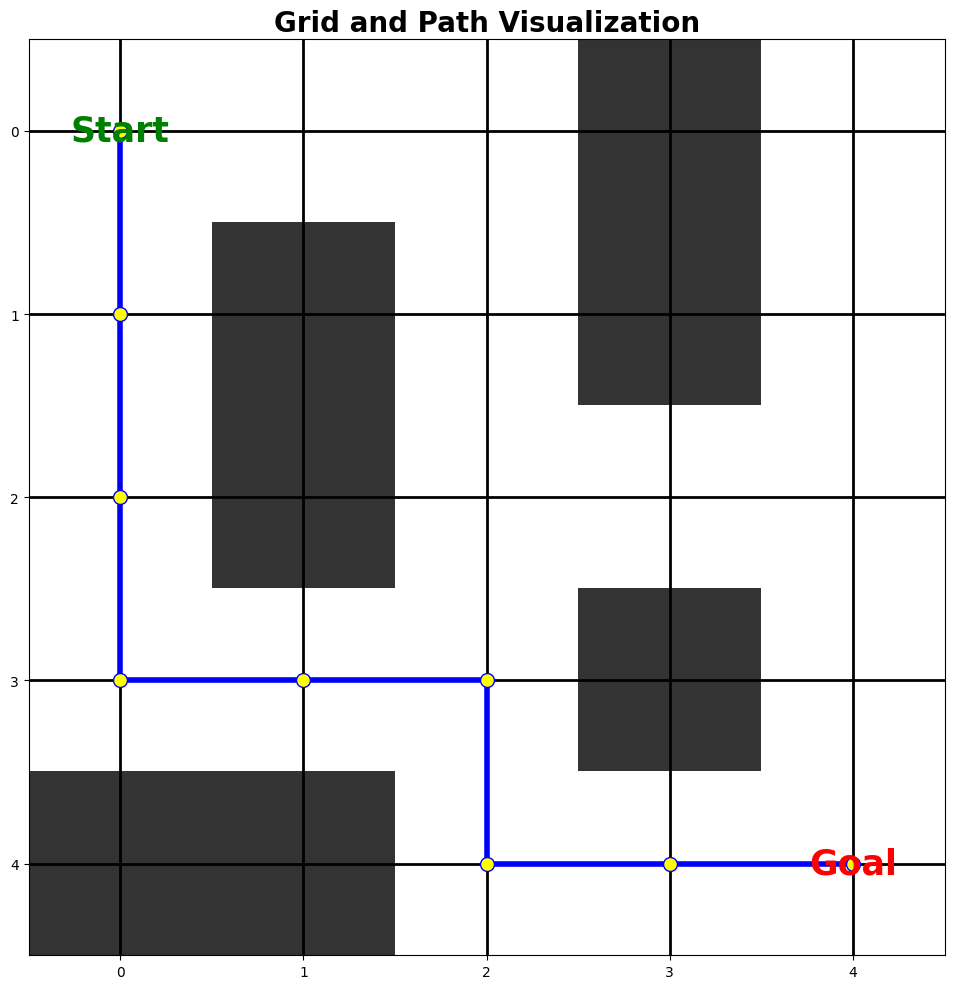

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# hướng di chuyển có thể: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])
        
    # kiểm tra vị trí có nằm trong dạng lưới & vị trí có bị chặn hay không
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0
        
    # tìm kiếm theo chiều rộng để tìm đường đi ngắn nhất từ điểm bắt đầu đến điểm kết thúc
    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])
        
        while queue:
            current, path = queue.popleft()
            
            # nếu vị trí hiện tại là mục tiêu, trả về đường dẫn
            if current == self.goal:
                return path

            # khám phá tất cả các đường đi có thể (lên, xuống, trái, phải)
            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)
                
                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))
                    
        return None  # trả về None nếu không có đường dẫn đến đích
        
    # hầm trực quan dạng lưới và đường dẫn
    def visualize(self, path):
        grid_np = np.array(self.grid)
        
        # tạo hình và trục số
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)
        
        # đánh dấu điểm bắt đầu và điểm kết thúc bằng các ký hiệu đặc biệt
        ax.text(self.start[1], self.start[0], 'Start', color='green', fontsize=25, fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red', fontsize=25, fontweight='bold', ha='center', va='center')
        
        # về đường đi nếu tìm thấy
        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4.0, marker='o', markersize=10, markerfacecolor='yellow', label='Path')
            
        # kiểu dạng lưới và gần nhân
        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)
        
        # add tiêu đề dạng lưới và trực quan biểu đồ
        plt.title("Grid and Path Visualization", fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()

# dạng lưới (0 = ô trống, 1 = chướng ngại vật)
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0]
]

# vị trí điểm bắt đầu và điểm đích
start = (0, 0)
goal = (4, 4)

# hàm FSSP_BFS- tìm kiếm chiều rộng
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()

if path:
    print(f"Path found: {path}")
    # trực quan đường dẫn
    planner.visualize(path)
else:
    print("No path found")

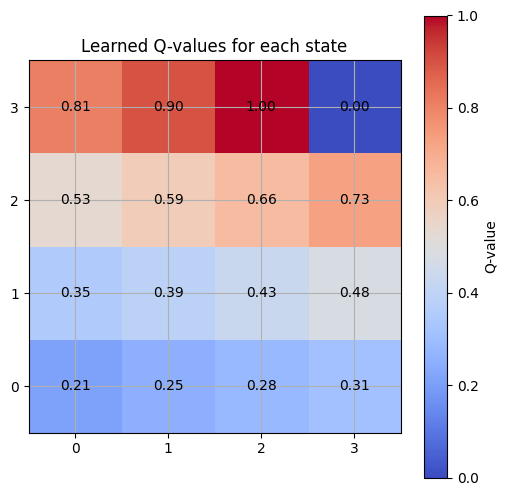

Learned Q-table:
[[1.75006081e-07 3.88494035e-02 4.35437196e-02 2.07786302e-01]
 [7.05204472e-02 2.53367464e-01 6.88606547e-02 1.27210518e-01]
 [1.95479106e-01 6.83740907e-02 1.04251458e-01 2.82424919e-01]
 [2.35896559e-01 3.13810537e-01 1.62810304e-01 2.33338920e-01]
 [2.87229282e-01 2.69702537e-01 2.08037853e-01 3.48678439e-01]
 [2.88549670e-01 3.27302587e-01 2.76130069e-01 3.87420489e-01]
 [3.40800208e-01 4.30467210e-01 3.60818340e-01 3.60547711e-01]
 [4.04899022e-01 4.07618778e-01 3.82967268e-01 4.78296900e-01]
 [4.58315743e-01 4.84830175e-01 5.31441000e-01 5.04453290e-01]
 [5.69602065e-01 5.68569557e-01 5.90490000e-01 5.76497427e-01]
 [6.18483662e-01 6.56100000e-01 6.30932180e-01 6.24025284e-01]
 [7.29000000e-01 7.19629626e-01 6.94195015e-01 7.16401091e-01]
 [8.10000000e-01 8.05216462e-01 7.74517727e-01 8.01015257e-01]
 [9.00000000e-01 8.90771230e-01 8.73049788e-01 8.94316108e-01]
 [1.00000000e+00 9.92930350e-01 9.91272036e-01 9.85219117e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# các siêu tham số
n_states = 16
n_actions = 4
goal_state = 15
Q_table = np.zeros((n_states, n_actions))
alpha = 0.1  # hệ số alpha
gamma = 0.9  # hệ số gamma
exploration_prob = 0.2
epochs = 1000  # hệ số tập

# quy trình của Q learning
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)
    while current_state != goal_state:
        # khám phá so với khai thác (e-chính sách tham lam)
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])
            
        # chuyển sang trạng thái tiếp theo
        next_state = (current_state + 1) % n_states
        
        # phần thưởng 1 nếu đạt được goal_state, 0 nếu không đạt 
        reward = 1 if next_state == goal_state else 0
        
        # cập nhật giá trị Q
        Q_table[current_state, action] = Q_table[current_state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[current_state, action])
        
        current_state = next_state  # cập nhật trạng thái hiện tại

# trực quan bảng Q dạng lưới
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

# biểu đồ dạng lưới các giá trị Q
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()

# bố cục dạng lưới
plt.grid(True)

# các giá trị Q dạng lưới
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# xuất ra bảng Q đã học
print("Learned Q-table:")
print(Q_table)